    ./gsl-latest/gsl-2.8$ ./configure --prefix=/usr3/articles/sagemath_docker_build/work/vimaniks/gsl/local

    make && make install

    ./gsl$ make test
    gcc -o test vanderpol.o -I. -I./local/include -O0 -g -Werror -Wformat -L./local/lib -lm -lgsl -lgslcblas
    ./gsl$ ./test 

    ./gsl$ make mylib
    :/articles/sagemath_docker_build/work/vimaniks/gsl$ make mylib
    c99 -c -o pendulum_lib.o pendulum_lib.c -I. -I./local/include  -fPIC -O0 -g -Werror -Wformat 
    c99  -shared  -o mylib.so pendulum_lib.o  -Wl,-Bstatic -lgsl -lgslcblas -Wl,-Bdynamic -lm

In [1]:
import os 
import numpy as np
from scipy import integrate as scipy_integrate, LowLevelCallable
# Command to execute
cmd = 'make clean'

# Using os.system() method
os.system(cmd)

rm -f pendulum.o
rm -f test
rm -f libtest
rm -f mylib.so
rm *.o


0

In [2]:
# Command to execute
cmd = 'make mylib'

# Using os.system() method
os.system(cmd)

c99 -c -o pendulum_lib.o pendulum_lib.c -I. -I./local/include  -fPIC -O0 -g -Werror -Wformat 
c99  -shared  -o mylib.so pendulum_lib.o  -Wl,-Bstatic -lgsl -lgslcblas -Wl,-Bdynamic -lm


0

In [3]:
# Access your C code
import ctypes
from ctypes import *
so_file = "./mylib.so"
c_functions = ctypes.CDLL(so_file)

In [4]:
def init():
    #c_functions.init.restype =  ctypes.c_void
    c_functions.init.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                 ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                 ctypes.c_double, ctypes.c_double, )
    return c_functions.init

In [5]:
def alloc():
    #c_functions.alloc.restype =  ctypes.c_void
    #c_functions.alloc.argtypes = (ctypes.c_void,)
    return c_functions.alloc
def release():
    #c_functions.release.restype =  ctypes.c_void
    #c_functions.release.argtypes = (ctypes.c_void,)
    return c_functions.release

In [6]:
def apply():
    c_functions.apply.restype =  ctypes.c_int
    c_functions.apply.argtypes = (ctypes.c_double,
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.apply

In [7]:
m = c_double()
g_r = c_double()
g_l = c_double()
R = c_double()
p0_r = c_double()
p0_l = c_double()
q0_r = c_double()
q0_l = c_double()
t0 = c_double()

xc_r = c_double()
xc_l = c_double()
yc = c_double()


m.value = 1.0
g_r.value = 0.1
g_l.value = -0.1
R.value = 1.0
p0_r.value = 0.05
p0_l.value = -p0_r.value
q0_r.value = 0.0
q0_l.value = pi
t0.value = 0.0

S = 0.05

xc_r.value = R.value + S/2
xc_l.value = -R.value - S/2

yc.value = 0.0

    int apply(double ti, double * pt, double *pMomenta, double *pq,
              double * pdot_q, double * pddot_q, double * pdddot_q,
              double * psx, double * psy,
              double * pvx, double * pvy,
              double * pwx, double * pwy,
              double * pdot_wx, double * pdot_wy
             )

In [8]:
ti = c_double()
t = c_double()
p = c_double()
q = c_double()

dot_q = c_double()
ddot_q = c_double()
dddot_q = c_double()

sx = c_double()
sy = c_double()

vx = c_double()
vy = c_double()

wx = c_double()
wy = c_double()

dot_wx = c_double()
dot_wy = c_double()

In [9]:
t_q = []
t_p = []
t_v = []
t_w = []
t_dw = []

t_sx = []
t_sy = []

t_vx = []
t_vy = []
t_vv = []

t_wx = []
t_wy = []

t_dwx = []
t_dwy = []

In [10]:
def plotting():
    
    global t_q
    global t_p
    global t_v
    global t_w
    global t_dw

    global t_sx
    global t_sy

    global t_vx
    global t_vy
    global t_vv

    global t_wx
    global t_wy

    global t_dwx
    global t_dwy
    
    t_q = []
    t_p = []
    t_v = []
    t_w = []
    t_dw = []

    t_sx = []
    t_sy = []

    t_vx = []
    t_vy = []
    t_vv = []

    t_wx = []
    t_wy = []

    t_dwx = []
    t_dwy = []
    
    import numpy as np
    for t_i in np.arange(0.0, 2*24.0, 0.01):
        ti.value = t_i
        apply()(ti, byref(t), byref(p), byref(q),
                byref(dot_q), byref(ddot_q), byref(dddot_q),
                byref(sx), byref(sy),
                byref(vx), byref(vy),
                byref(wx), byref(wy),
                byref(dot_wx), byref(dot_wy)
               )

        # print(t_i, t.value, p.value, p.value)
        t_p += [(t.value, p.value)]
        t_q += [(t.value, q.value)]

        #_dot_q   = p.value / m.value
        #_ddot_q  = R.value * g.value * sin(q.value)
        #_dddot_q = R.value * g.value * cos(q.value) * _dot_q

        t_v  += [(t.value, dot_q.value)]
        t_w  += [(t.value, ddot_q.value)]
        t_dw += [(t.value, dddot_q.value)]

        t_sx += [(t.value, sx.value)]
        t_sy += [(t.value, sy.value)]

        t_vx += [(t.value, vx.value)]    
        t_vy += [(t.value, vy.value)]

        t_vv += [(t.value, vx.value * vx.value + vy.value*vy.value)]

        t_wx += [(t.value, wx.value)]    
        t_wy += [(t.value, wy.value)]
        t_dwx += [(t.value, dot_wx.value)]
        t_dwy += [(t.value, dot_wy.value)]

In [11]:
init()(m,g_r,R,p0_r,q0_r,t0, xc_r, yc)
alloc()()
plotting()
release()()

0

In [12]:
plt_pq_r  = list_plot(t_p, color="red")
plt_pq_r += list_plot(t_q, color="green")
#plt_pq_r.show(title="p (red), q=phi (green)")

In [13]:
plt_qvw_r  = list_plot(t_q,  color="green")
plt_qvw_r += list_plot(t_v,  color="red")
plt_qvw_r += list_plot(t_w,  color="yellow")
plt_qvw_r += list_plot(t_dw, color="brown")
#plt_qvw_r.show(title="q=phi (green), v (red), w (yellow), dot_w (brown)")

In [14]:
plt_sx_sy_r  = list_plot(t_sx,  color="green")
plt_sx_sy_r += list_plot(t_sy,  color="red")
#plt_sx_sy_r.show(title="sx (green), sy (red)")

In [15]:
plt_vv_r  = list_plot(t_vv,  color="green")
#plt_vv_r.show(title="vv (green)")

In [16]:
plt_vx_vy_r  = list_plot(t_vx,  color="green")
plt_vx_vy_r += list_plot(t_vy,  color="red")
#plt_vx_vy_r.show(title="vx (green), vy (red)")

In [17]:
plt_wx_wy_r  = list_plot(t_wx,  color="green")
plt_wx_wy_r += list_plot(t_wy,  color="red")
#plt_wx_wy_r.show(title="wx (green), wy (red)")

In [18]:
plt_dwx_dwy_r  = list_plot(t_dwx,  color="green")
plt_dwx_dwy_r += list_plot(t_dwy,  color="red")
#plt_dwx_dwy_r.show(title="dot_wx (green), dot_wy (red)")

In [19]:
init()(m,g_l,R,p0_l,q0_l,t0, xc_l, yc)
alloc()()
plotting()
release()()

0

In [20]:
plt_pq_l  = list_plot(t_p, color="red")
plt_pq_l += list_plot(t_q, color="green")
#plt_pq_l.show(title="p (red), q=phi (green)")

In [21]:
plt_qvw_l  = list_plot(t_q,  color="green")
plt_qvw_l += list_plot(t_v,  color="red")
plt_qvw_l += list_plot(t_w,  color="yellow")
plt_qvw_l += list_plot(t_dw, color="brown")
#plt_qvw_l.show(title="q=phi (green), v (red), w (yellow), dot_w (brown)")

In [22]:
plt_sx_sy_l  = list_plot(t_sx,  color="green")
plt_sx_sy_l += list_plot(t_sy,  color="red")
#plt_sx_sy_l.show(title="sx (green), sy (red)")

In [23]:
plt_vv_l  = list_plot(t_vv,  color="green")
#plt_vv_l.show(title="vv (green)")

In [24]:
plt_vx_vy_l  = list_plot(t_vx,  color="green")
plt_vx_vy_l += list_plot(t_vy,  color="red")
#plt_vx_vy_l.show(title="vx (green), vy (red)")

In [25]:
plt_wx_wy_l  = list_plot(t_wx,  color="green")
plt_wx_wy_l += list_plot(t_wy,  color="red")
#plt_wx_wy_l.show(title="wx (green), wy (red)")

In [26]:
plt_dwx_dwy_l  = list_plot(t_dwx,  color="green")
plt_dwx_dwy_l += list_plot(t_dwy,  color="red")
#plt_dwx_dwy_l.show(title="dot_wx (green), dot_wy (red)")

In [27]:
def find_period_by_newton_root():
    c_functions.find_period_by_newton_root.restype = ctypes.c_int
    c_functions.find_period_by_newton_root.argtypes = (
        ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.find_period_by_newton_root

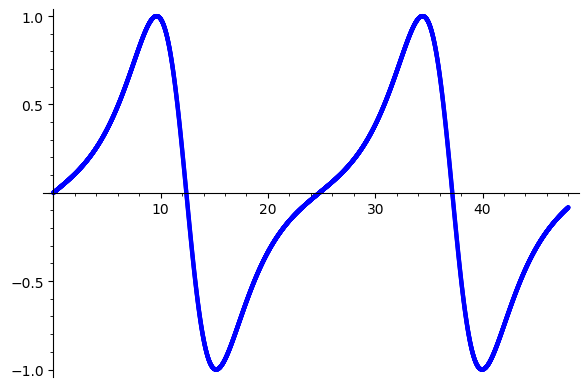

In [28]:
list_plot(t_sy)

In [29]:
pre_t = 0
pre_sy = 0
start = True
nulls_sy = []
f_nulls_sy = []
for t,sy in t_sy:
    if pre_sy * sy < 0.0:
        syi = (pre_sy,sy)
        Ti = (pre_t,t)
        print(Ti)
        nulls_sy += [Ti]
        f_nulls_sy += [syi]
    if pre_sy * sy != 0 or start:
        pre_t = t
        pre_sy = sy
        start = False

(12.39, 12.4)
(24.78, 24.79)
(37.18, 37.19)


In [30]:
if len(nulls_sy) > 1:
    print (nulls_sy[1])
    init_T = (nulls_sy[1][0] + nulls_sy[1][1])/2
init_T, f_nulls_sy[1]

(24.78, 24.79)


(24.785, (-0.0004002705473166415, 9.9729875974156e-05))

In [33]:
init()(m,g_l,R,p0_l,q0_l,t0, xc_l, yc)
alloc()()
T_l = c_double(init_T)
fT_l = c_double()
ret = find_period_by_newton_root()(byref(T_l), byref(fT_l))
release()()
ret, T_l, fT_l

(32556, c_double(24.788028644055277), c_double(-1.2246467991473532e-16))

In [34]:
init()(m,g_r,R,p0_r,q0_r,t0, xc_r, yc)
alloc()()
T_r = c_double(init_T)
fT_r = c_double()
ret = find_period_by_newton_root()(byref(T_r), byref(fT_r))
release()()
ret, T_r, fT_r

(32556, c_double(24.78802864407731), c_double(-2.4492935982947064e-16))

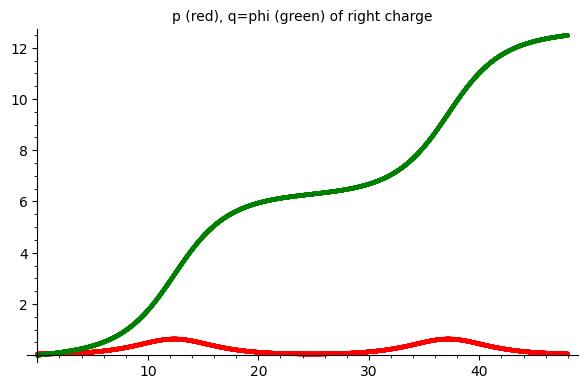

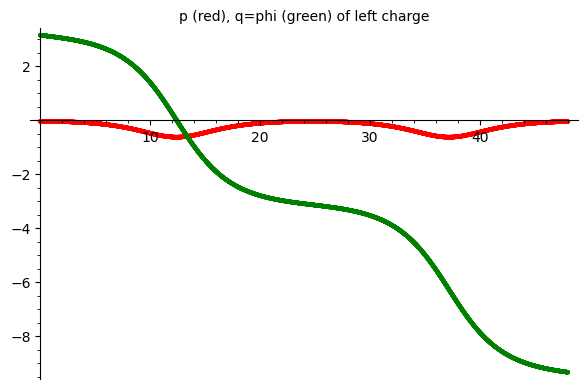

In [31]:
plt_pq_r.show(title="p (red), q=phi (green) of right charge")
plt_pq_l.show(title="p (red), q=phi (green) of left charge")

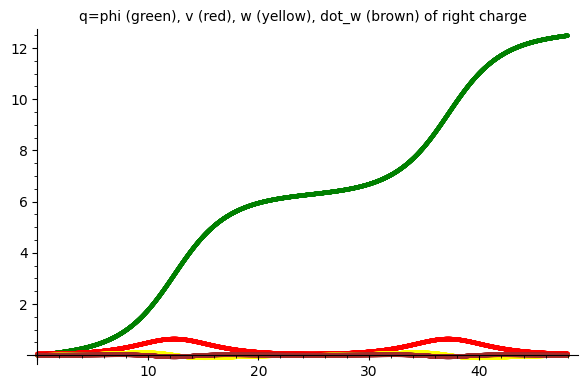

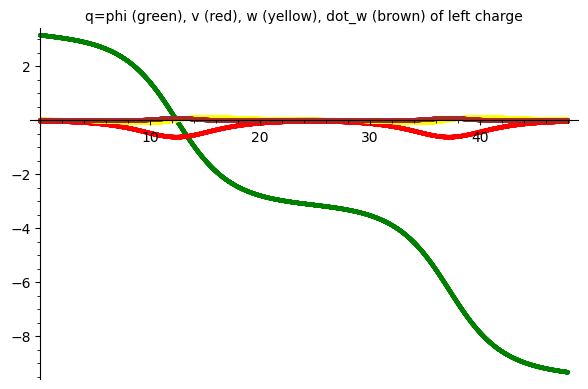

In [32]:
plt_qvw_r.show(title="q=phi (green), v (red), w (yellow), dot_w (brown) of right charge")
plt_qvw_l.show(title="q=phi (green), v (red), w (yellow), dot_w (brown) of left charge")

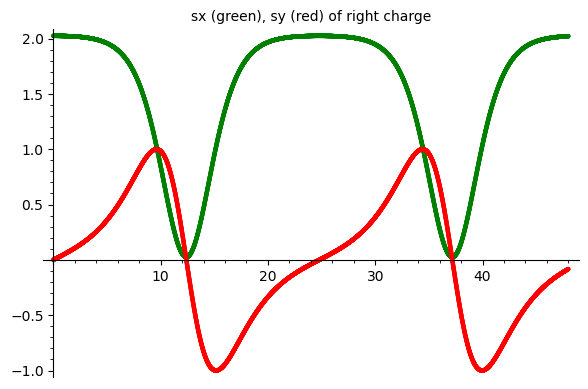

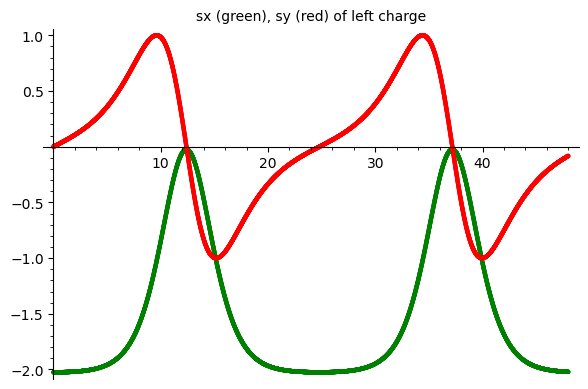

In [33]:
plt_sx_sy_r.show(title="sx (green), sy (red) of right charge")
plt_sx_sy_l.show(title="sx (green), sy (red) of left charge")

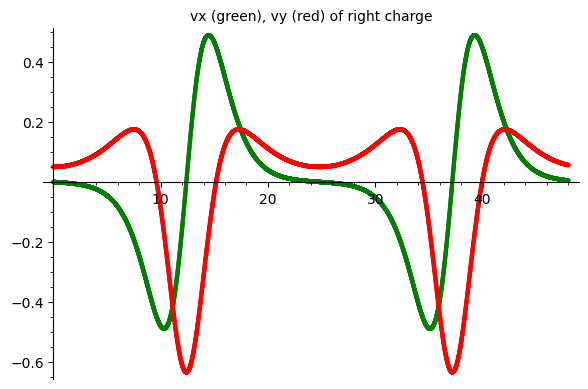

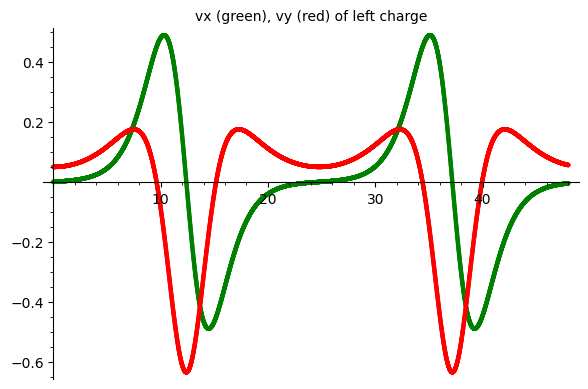

In [34]:
plt_vx_vy_r.show(title="vx (green), vy (red) of right charge")
plt_vx_vy_l.show(title="vx (green), vy (red) of left charge")

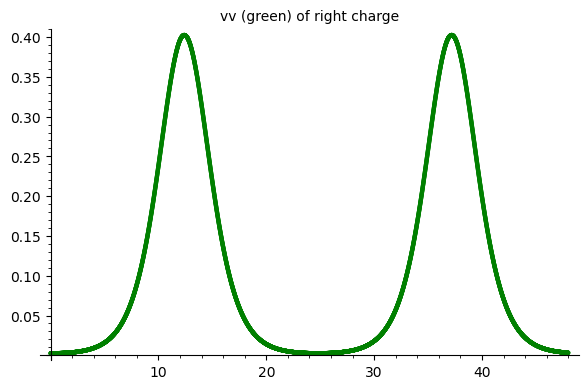

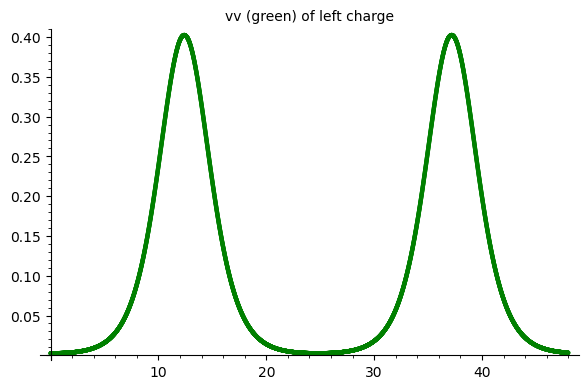

In [35]:
plt_vv_r.show(title="vv (green) of right charge")
plt_vv_l.show(title="vv (green) of left charge")

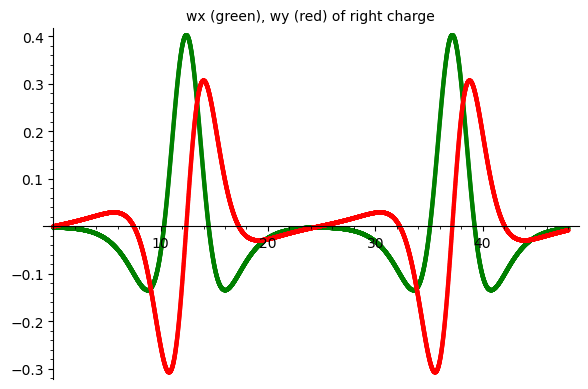

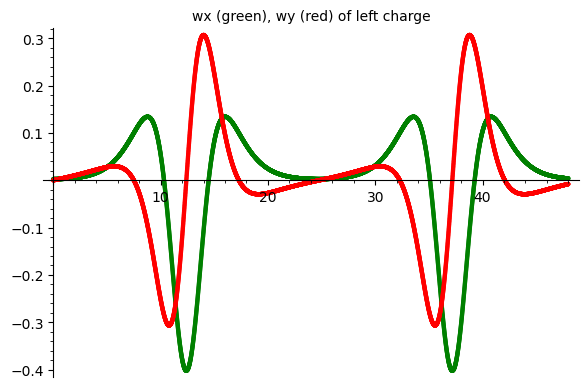

In [36]:
plt_wx_wy_r.show(title="wx (green), wy (red) of right charge")
plt_wx_wy_l.show(title="wx (green), wy (red) of left charge")

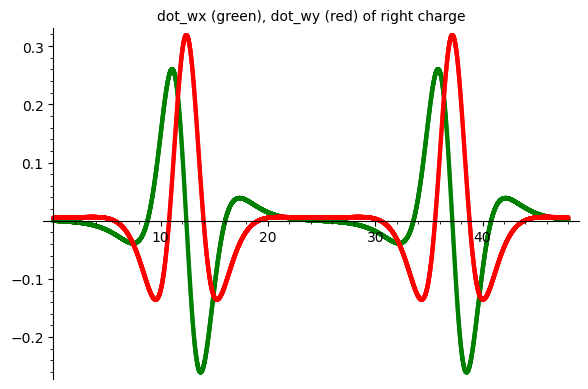

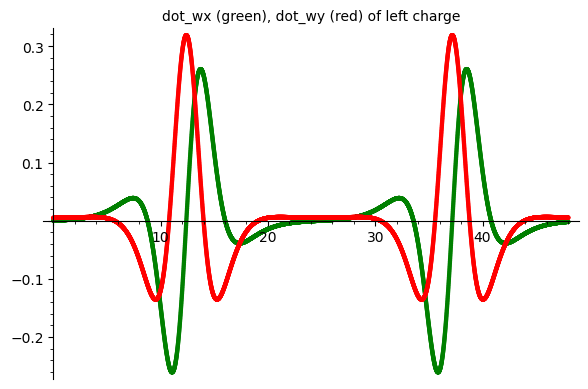

In [37]:
plt_dwx_dwy_r.show(title="dot_wx (green), dot_wy (red) of right charge")
plt_dwx_dwy_l.show(title="dot_wx (green), dot_wy (red) of left charge")

In [38]:
def cget_c():
    c_functions.cget_c.restype =  ctypes.c_double
    #c_functions.cget_c.argtypes = (,)
    return c_functions.cget_c

In [39]:
cget_c()()

1.0

In [40]:
def get_c():
    return cget_c()()

In [41]:
get_c()

1.0

def set_c():
    #c_functions.cset_c.restype =  ctypes.c_int
    c_functions.cset_c.argtypes = (ctypes.c_double,)
    return c_functions.cset_c

def set_timespan_Epsilon():
    #c_functions.cset_timespan_Epsilon.restype =  ctypes.c_int
    c_functions.cset_timespan_Epsilon.argtypes = (ctypes.c_double,)
    return c_functions.cset_timespan_Epsilon

def set_distance_Epsilon():
    #c_functions.cset_distance_Epsilon.restype =  ctypes.c_int
    c_functions.cset_distance_Epsilon.argtypes = (ctypes.c_double,)
    return c_functions.cset_distance_Epsilon

def set_min_newton_step():
    #c_functions.cset_min_newton_step.restype =  ctypes.c_int
    c_functions.cset_min_newton_step.argtypes = (ctypes.c_double,)
    return c_functions.cset_min_newton_step

def set_newton_step_multiplier():
    #c_functions.cset_newton_step_multiplier.restype =  ctypes.c_int
    c_functions.cset_newton_step_multiplier.argtypes = (ctypes.c_double,)
    return c_functions.cset_newton_step_multiplier

    // отношение радиуса Лиенара Вихерта к длине радиус-вектора
    int klw(coordinate x, coordinate y, coordinate z, timevalue t,
            double *pk, coordinate * rlagerror)

In [42]:
def klw():
    c_functions.klw.restype =  ctypes.c_int
    c_functions.klw.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                ctypes.c_double, ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.klw

    // Радиус Лиенара Вихерта
    int Rlw(coordinate x, coordinate y, coordinate z, timevalue t,
            double *pRlw, coordinate * rlagerror)

In [43]:
def Rlw():
    c_functions.Rlw.restype =  ctypes.c_int
    c_functions.Rlw.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                ctypes.c_double,
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.Rlw

    // phi_lw - скалярный потенциал Лиенара Вихерта
    int philw(coordinate x, coordinate y, coordinate z, timevalue t,
              charge q,
              double *pphi, coordinate * rlagerror)

In [44]:
def phi_lw():
    c_functions.philw.restype =  ctypes.c_int
    c_functions.philw.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                ctypes.c_double, ctypes.c_double,
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.philw

    // A_lw - векторный потенциал Лиенара Вихерта
    int Alw(coordinate x, coordinate y, coordinate z, timevalue t,
            charge q,
            field * A_x, field * A_y, field * A_z, coordinate * rlagerror)

In [45]:
def A_lw():
    c_functions.Alw.restype =  ctypes.c_int
    c_functions.Alw.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                ctypes.c_double, ctypes.c_double,
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
    )
    return c_functions.Alw

    int electr_magnet(coordinate x, coordinate y, coordinate z, timevalue t,
                       charge q,
                       field * E_x, field * E_y, field * E_z,
                       field * B_x, field * B_y, field * B_z,
                       coordinate * rlagerror)

In [46]:
def EH_lw():
    c_functions.electr_magnet.restype =  ctypes.c_int
    c_functions.electr_magnet.argtypes = (ctypes.c_double, ctypes.c_double, ctypes.c_double,
                                ctypes.c_double, ctypes.c_double,
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double),
        ctypes.POINTER(ctypes.c_double)
    )
    return c_functions.electr_magnet

In [47]:
x = c_double()
y = c_double()
z = c_double()

t = c_double()
t2 = c_double()

q_r = c_double(+1.0)
q_l = c_double(-1.0)

k = c_double()
rlw = c_double()
philw = c_double()
Ax_l = c_double()
Ay_l = c_double()
Az_l = c_double()

Ez_l = c_double()
Ex_l = c_double()
Ey_l = c_double()

Hz_l = c_double()
Hx_l = c_double()
Hy_l = c_double()

Ax_r = c_double()
Ay_r = c_double()
Az_r = c_double()

Ex_r = c_double()
Ey_r = c_double()
Ez_r = c_double()

Hx_r = c_double()
Hy_r = c_double()
Hz_r = c_double()
rlagerror = c_double()

In [48]:
t_cur = 12.5

In [49]:
round_R = 7.0
round_R

7.00000000000000

In [50]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(-round_R, +round_R, 70*2)
ya_linspace = np.linspace(-round_R, +round_R, 70*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t2_l = ya_grid * np.nan

t2_r = ya_grid * np.nan
klw_l = ya_grid * np.nan
klw_r = ya_grid * np.nan
rlw_l = ya_grid * np.nan
rlw_r = ya_grid * np.nan

phi_l = ya_grid * np.nan
phi_r = ya_grid * np.nan

s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan
ay_ = ya_grid * np.nan
am_ = ya_grid * np.nan
an_ = ya_grid * np.nan
ap_l = ya_grid * np.nan
ap_r = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

sx_l = ya_grid * np.nan
sy_l = ya_grid * np.nan
sz_l = ya_grid * np.nan

sr_l = ya_grid * np.nan
st_l = ya_grid * np.nan

sr_r = ya_grid * np.nan
st_r = ya_grid * np.nan

sr_ = ya_grid * np.nan
st_ = ya_grid * np.nan

sx_r = ya_grid * np.nan
sy_r = ya_grid * np.nan
sz_r = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max


q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        
        t.value = t_cur
        x.value = Xa
        y.value = Ya
        z.value = Za

        init()(m, g_r, R, p0_r, q0_r, t0, xc_r, yc)
        alloc()()
        klw()(x, y, z, t, byref(t2), byref(k), byref(rlagerror))
        Rlw()(x, y, z, t, byref(rlw), byref(rlagerror))
        phi_lw()(x, y, z, t, q_r, byref(philw), byref(rlagerror))
        A_lw()(x, y, z, t, q_r, byref(Ax_r), byref(Ay_r), byref(Az_r), byref(rlagerror))
        EH_lw()(x, y, z, t, q_r,
                byref(Ex_r), byref(Ey_r), byref(Ez_r),
                byref(Hx_r), byref(Hy_r), byref(Hz_r),
                byref(rlagerror))
        release()()

        t2_r[iy][ix] = t2.value
        klw_r[iy][ix] = k.value
        rlw_r[iy][ix] = rlw.value
        phi_r[iy][ix] = philw.value
        
        init()(m, g_l, R, p0_l, q0_l, t0, xc_l, yc)
        alloc()()
        klw()(x, y, z, t, byref(t2), byref(k), byref(rlagerror))
        Rlw()(x, y, z, t, byref(rlw), byref(rlagerror))
        phi_lw()(x, y, z, t, q_l, byref(philw), byref(rlagerror))
        A_lw()(x, y, z, t, q_l, byref(Ax_l), byref(Ay_l), byref(Az_l), byref(rlagerror))
        EH_lw()(x, y, z, t, q_l,
                byref(Ex_l), byref(Ey_l), byref(Ez_l),
                byref(Hx_l), byref(Hy_l), byref(Hz_l),
                byref(rlagerror))
        release()()
        
        t2_l[iy][ix] = t2.value
        klw_l[iy][ix] = k.value
        rlw_l[iy][ix] = rlw.value
        phi_l[iy][ix] = philw.value
        
        s_[iy][ix] = phi_r[iy][ix]+phi_l[iy][ix]

        ax_[iy][ix] = Ax_l.value + Ax_r.value
        ay_[iy][ix] = Ay_l.value + Ay_r.value
        am_[iy][ix] = sqrt((Ax_l.value + Ax_r.value)^2 + (Ay_l.value + Ay_r.value)^2)
        an_[iy][ix] = atan2((Ay_l.value + Ay_r.value),(Ax_l.value + Ax_r.value))
        
        # angle between vector A and polar axis with center of rotated charge
        beta_l = atan2(Ya-yc.value, Xa-xc_l.value) - atan2(Ay_l.value, Ax_l.value) + pi/2
        beta_r = atan2(Ya-yc.value, Xa-xc_r.value) - atan2(Ay_r.value, Ax_r.value) + pi/2
        
        A_phi_l = sqrt((Ax_l.value)^2 + (Ay_l.value)^2) * cos(beta_l)
        A_phi_r = sqrt((Ax_r.value)^2 + (Ay_r.value)^2) * cos(beta_r)

        ap_l[iy][ix] = A_phi_l
        ap_r[iy][ix] = A_phi_r
        
        
        #(Ex_r, Ey_r, Ez_r, Hx_r, Hy_r, Hz_r) = EB_lw(Xa, Ya, Za, t_cur, q, 
        #      get_xc_r(), get_yc_r(), get_zc_r(), get_R_r(), -get_omega(), alpha=0)
        #(Ex_l, Ey_l, Ez_l, Hx_l, Hy_l, Hz_l) = EB_lw(Xa, Ya, Za, t_cur, q, 
        #      get_xc_l(), get_yc_l(), get_zc_l(), get_R_l(), +get_omega(), alpha=0)

        Ex = Ex_l.value + Ex_r.value
        Ey = Ey_l.value + Ey_r.value
        Ez = Ez_l.value + Ez_r.value

        Hx = Hx_l.value + Hx_r.value
        Hy = Hy_l.value + Hy_r.value
        Hz = Hz_l.value + Hz_r.value

        # The Poynting vector S is defined as to be equal
        # to the cross product (1/mu)E × B

        Sx_l = get_c()/(4*pi)*(Ey_l.value * Hz_l.value - Ez_l.value * Hy_l.value);
        Sy_l = get_c()/(4*pi)*(Ez_l.value * Hx_l.value - Ex_l.value * Hz_l.value);
        Sz_l = get_c()/(4*pi)*(Ex_l.value * Hy_l.value - Ey_l.value * Hx_l.value);

        Sx_r = get_c()/(4*pi)*(Ey_r.value * Hz_r.value - Ez_r.value * Hy_r.value);
        Sy_r = get_c()/(4*pi)*(Ez_r.value * Hx_r.value - Ex_r.value * Hz_r.value);
        Sz_r = get_c()/(4*pi)*(Ex_r.value * Hy_r.value - Ey_r.value * Hx_r.value);

        Sx = get_c()/(4*pi)*(Ey * Hz - Ez * Hy);
        Sy = get_c()/(4*pi)*(Ez * Hx - Ex * Hz);
        Sz = get_c()/(4*pi)*(Ex * Hy - Ey * Hx);

        # polar angle
        angle_phi   = atan2(Ya, Xa)
        # polar angle with center of rotated charge
        angle_phi_l = atan2(Ya-yc.value, Xa-xc_l.value)
        angle_phi_r = atan2(Ya-yc.value, Xa-xc_r.value)

        # тангенциальная компонента вектора Пойнтинга
        S_alpha   = Sy   * cos(angle_phi)   - Sx   * sin(angle_phi);
        S_alpha_l = Sy_l * cos(angle_phi_l) - Sx_l * sin(angle_phi_l);
        S_alpha_r = Sy_r * cos(angle_phi_r) - Sx_r * sin(angle_phi_r);

        # радиальная компонента вектора Пойнтинга
        S_radial   = Sx/cos(angle_phi)     + Sy/sin(angle_phi)
        S_radial_r = Sx_r/cos(angle_phi_r) + Sy_r/sin(angle_phi_r)
        S_radial_l = Sx_l/cos(angle_phi_l) + Sy_l/sin(angle_phi_l)

        S_radial   = sqrt(Sx^2 + Sy^2)
        S_radial_r = sqrt(Sx_r^2 + Sy_r^2)
        S_radial_l = sqrt(Sx_l^2 + Sy_l^2)

        sr_[iy][ix] = S_radial
        st_[iy][ix] = S_alpha

        sr_l[iy][ix] = S_radial_l
        st_l[iy][ix] = S_alpha_l

        sr_r[iy][ix] = S_radial_r
        st_r[iy][ix] = S_alpha_r

        sx_l[iy][ix] = Sx_l
        sy_l[iy][ix] = Sy_l
        sz_l[iy][ix] = Sz_l

        sx_r[iy][ix] = Sx_r
        sy_r[iy][ix] = Sy_r
        sz_r[iy][ix] = Sz_r

        sx_[iy][ix] = Sx
        sy_[iy][ix] = Sy
        sz_[iy][ix] = Sz

        #if sx_min > S_x:
        #    sx_min = S_x
        #if sx_max < S_x:
        #    sx_max = S_x        

        #if sy_min > S_y:
        #    sy_min = S_y
        #if sy_max < S_y:
        #    sy_max = S_y


        #u_[iy][ix] = E_x
        #v_[iy][ix] = E_y
        #e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        #t2 = t_lag(Xa, Ya, 0, t_cur)
        #t_[iy][ix] = t2


        #bz_[iy][ix] = B_z
        #if bz_min > B_z:
        #    bz_min = B_z
        #if bz_max < B_z:
        #    bz_max = B_z

In [51]:
def plot_lw(xa_grid, ya_grid, lw, title, levels=None):
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(xa_grid, ya_grid, lw, levels=levels)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title(title)
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    ax.set_aspect(1)
    return plt

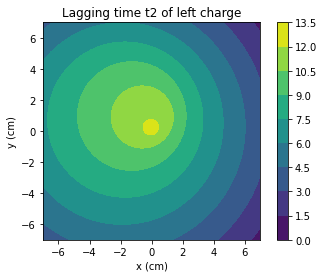

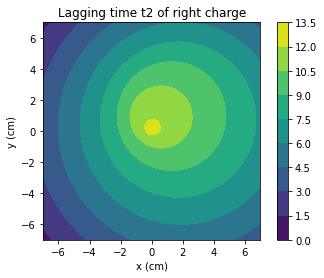

In [52]:
plot_lw(xa_grid, ya_grid, lw=t2_l, title='Lagging time t2 of left charge',
    levels = None).show()
plot_lw(xa_grid, ya_grid, lw=t2_r, title='Lagging time t2 of right charge',
    levels = None).show()

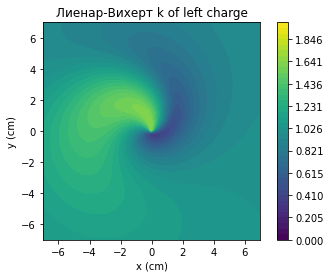

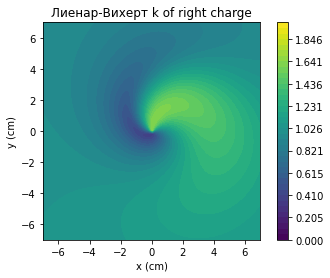

In [53]:
plot_lw(xa_grid, ya_grid, lw=klw_l, title='Лиенар-Вихерт k of left charge',
    levels = np.linspace(0, 2, 40)).show()
plot_lw(xa_grid, ya_grid, lw=klw_r, title='Лиенар-Вихерт k of right charge',
    levels = np.linspace(0, 2, 40)).show()

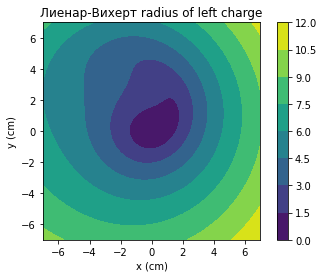

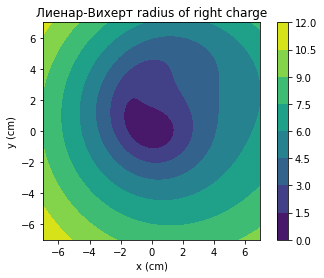

In [54]:
plot_lw(xa_grid, ya_grid, lw=rlw_l, title='Лиенар-Вихерт radius of left charge').show()
plot_lw(xa_grid, ya_grid, lw=rlw_r, title='Лиенар-Вихерт radius of right charge').show()

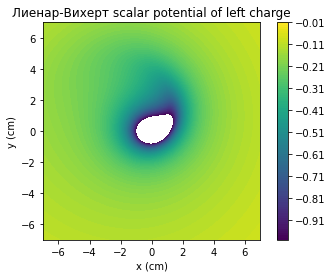

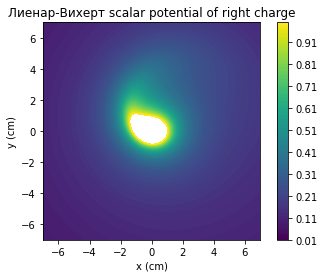

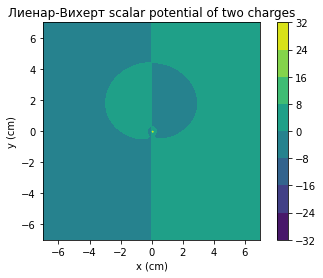

In [55]:
plot_lw(xa_grid, ya_grid, lw=phi_l,
        title='Лиенар-Вихерт scalar potential of left charge',
    levels = np.linspace(-1, -0.01, int((1-0.01)/0.01+1))).show()
plot_lw(xa_grid, ya_grid, lw=phi_r,
        title='Лиенар-Вихерт scalar potential of right charge',
    levels = np.linspace(0.01, 1, int((1-0.01)/0.01+1))).show()
plot_lw(xa_grid, ya_grid, lw=s_,
        title='Лиенар-Вихерт scalar potential of two charges',
    levels = None).show()

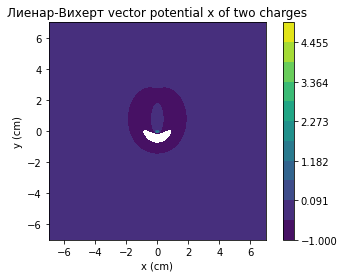

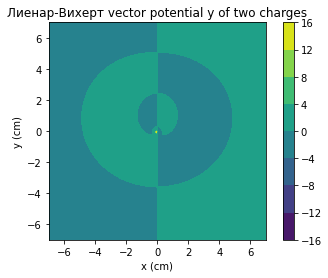

In [56]:
plot_lw(xa_grid, ya_grid, lw=ax_,
        title='Лиенар-Вихерт vector potential x of two charges',
    levels = np.linspace(-1.0, 5, 12)).show()
plot_lw(xa_grid, ya_grid, lw=ay_,
        title='Лиенар-Вихерт vector potential y of two charges').show()

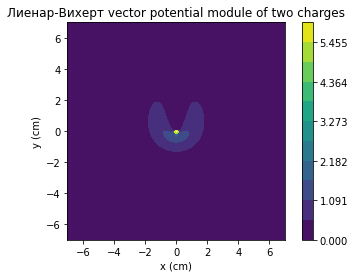

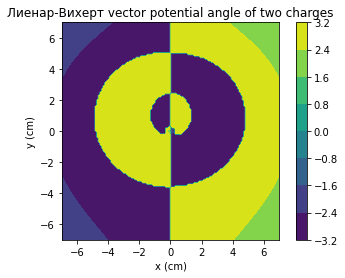

In [57]:
plot_lw(xa_grid, ya_grid, lw=am_,
        title='Лиенар-Вихерт vector potential module of two charges',
    levels = np.linspace(0, 6, 12)).show()
plot_lw(xa_grid, ya_grid, lw=an_,
        title='Лиенар-Вихерт vector potential angle of two charges').show()

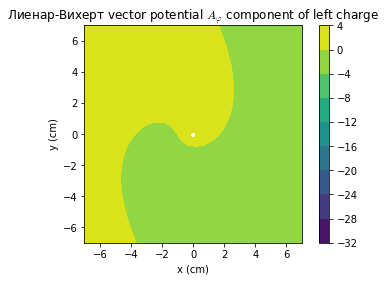

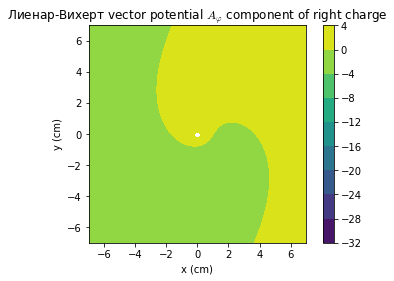

In [58]:
plot_lw(xa_grid, ya_grid, lw=ap_l,
        title='Лиенар-Вихерт vector potential $A_{\\varphi}$ component of left charge',
    levels = np.linspace(-32, 4, 10)).show()
plot_lw(xa_grid, ya_grid, lw=ap_r,
        title='Лиенар-Вихерт vector potential $A_{\\varphi}$ component of right charge',
       levels = np.linspace(-32, 4, 10)).show()

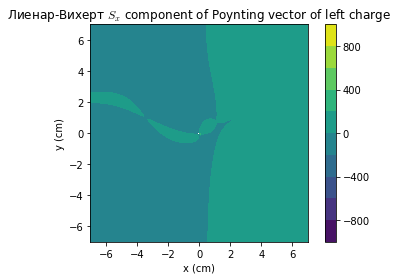

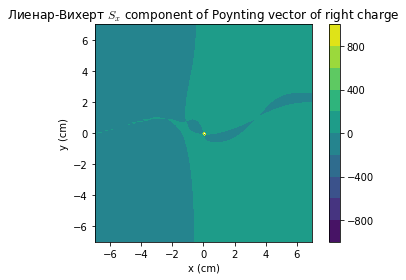

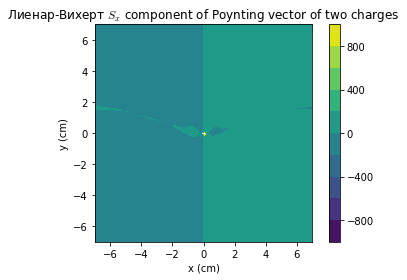

In [59]:
levels = np.linspace(-1000, 1000, 11)
plot_lw(xa_grid, ya_grid, lw=sx_l,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of left charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sx_r,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of right charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sx_,
        title='Лиенар-Вихерт $S_x$ component of Poynting vector of two charges',
    levels = levels).show()

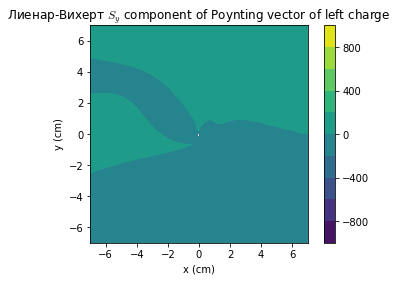

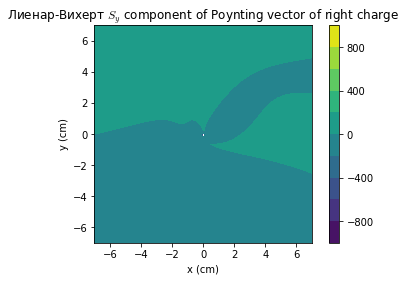

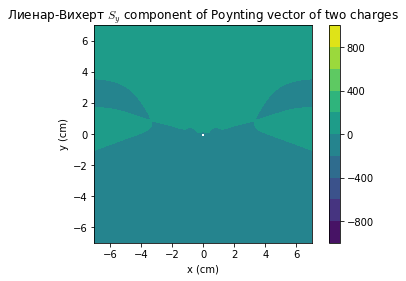

In [60]:
levels = np.linspace(-1000, 1000, 11)
plot_lw(xa_grid, ya_grid, lw=sy_l,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of left charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sy_r,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of right charge',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sy_,
        title='Лиенар-Вихерт $S_y$ component of Poynting vector of two charges',
    levels = levels).show()

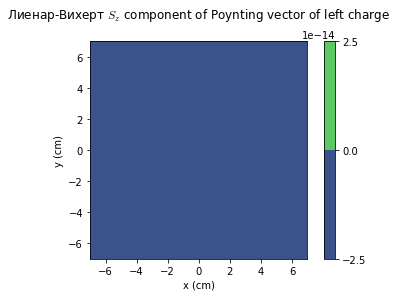

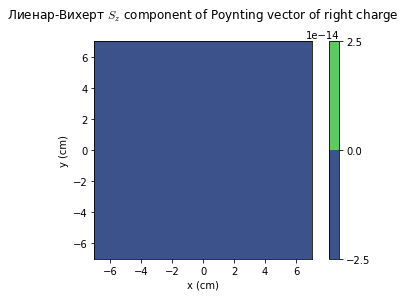

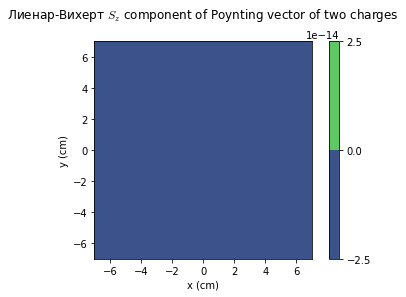

In [61]:
levels = None
plot_lw(xa_grid, ya_grid, lw=sz_l,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sz_r,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sz_,
        title='Лиенар-Вихерт $S_z$ component of Poynting vector of two charges\n',
    levels = levels).show()

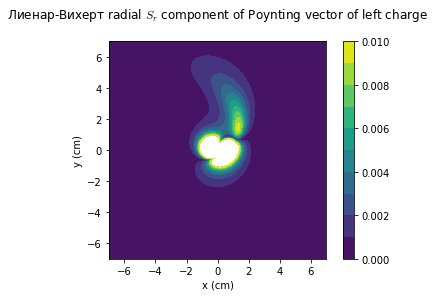

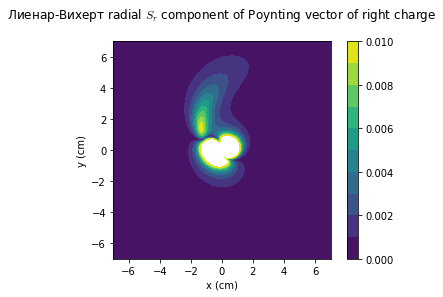

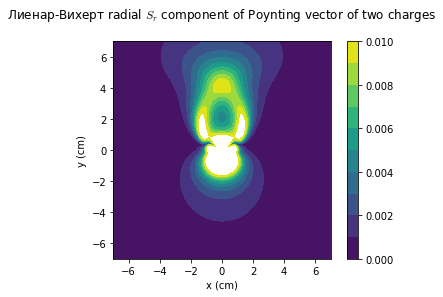

In [62]:
levels = None
levels = np.linspace(0, 0.01, 11)
plot_lw(xa_grid, ya_grid, lw=sr_l,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sr_r,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=sr_,
        title='Лиенар-Вихерт radial $S_r$ component of Poynting vector of two charges\n',
    levels = levels).show()

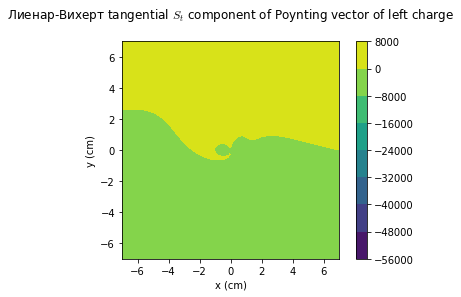

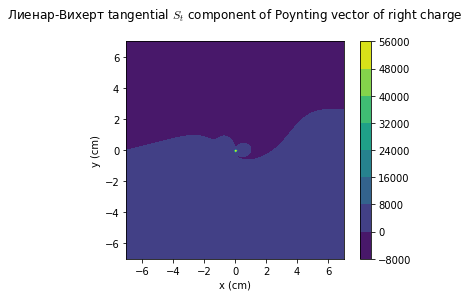

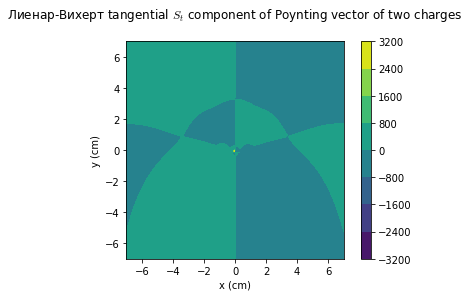

In [63]:
levels = None
plot_lw(xa_grid, ya_grid, lw=st_l,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of left charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=st_r,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of right charge\n',
    levels = levels).show()
plot_lw(xa_grid, ya_grid, lw=st_,
        title='Лиенар-Вихерт tangential $S_t$ component of Poynting vector of two charges\n',
    levels = levels).show()